In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas.plotting import scatter_matrix
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, scale
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("D:/NDHU Master/110-2/KML/Data_sets"))

# Any results you write to the current directory are saved as output.

['data.csv', 'data_2genre.csv']


In [3]:
music_df = pd.read_csv('D:/NDHU Master/110-2/KML/Data_sets/data.csv')
music_df.head(3)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues


In [4]:
genres = music_df.groupby('label')

['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']


<ipython-input-8-485087c7fc05>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,10))


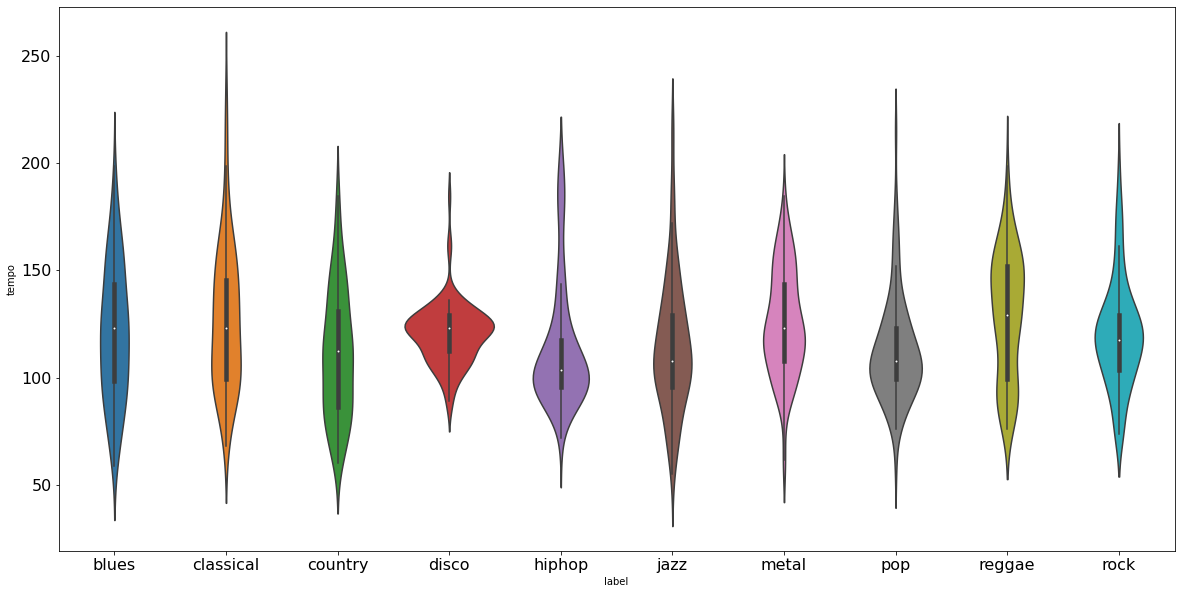

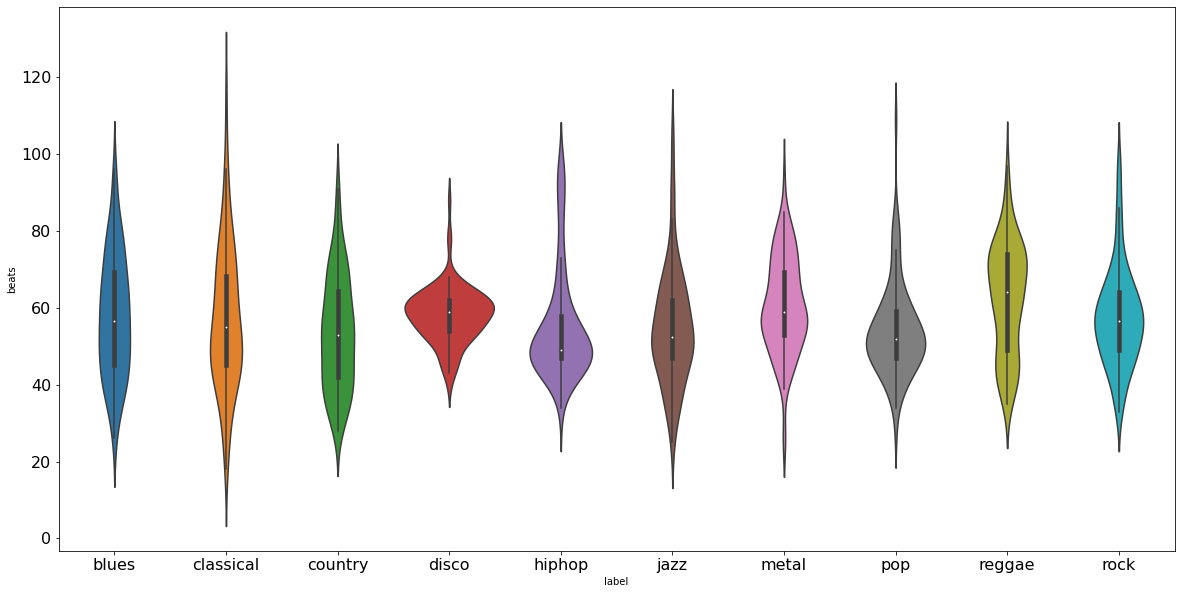

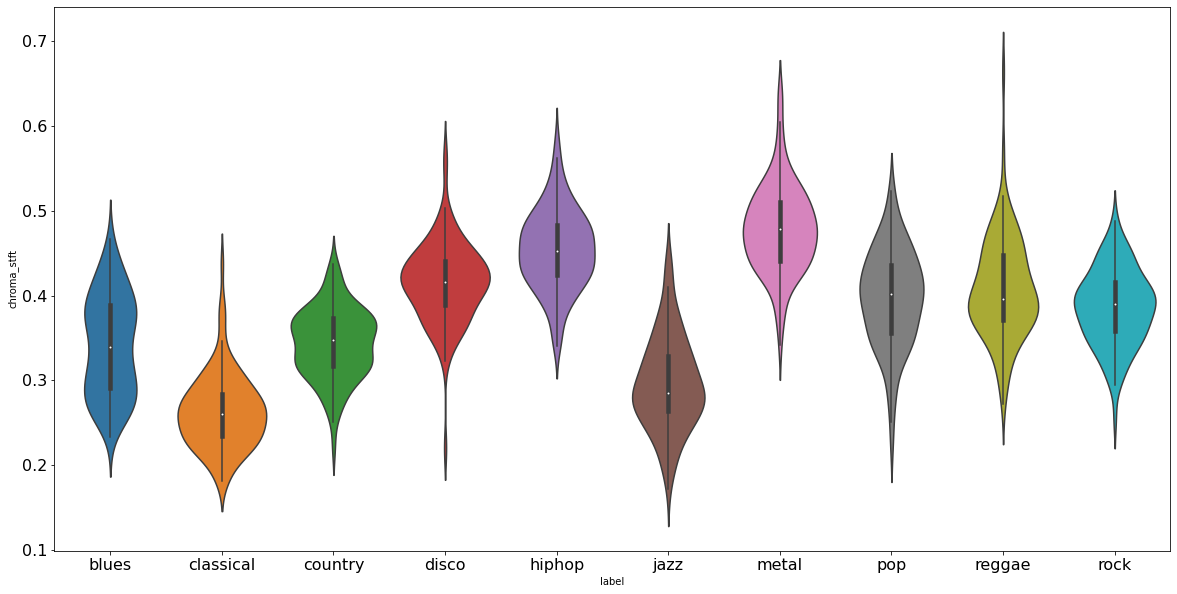

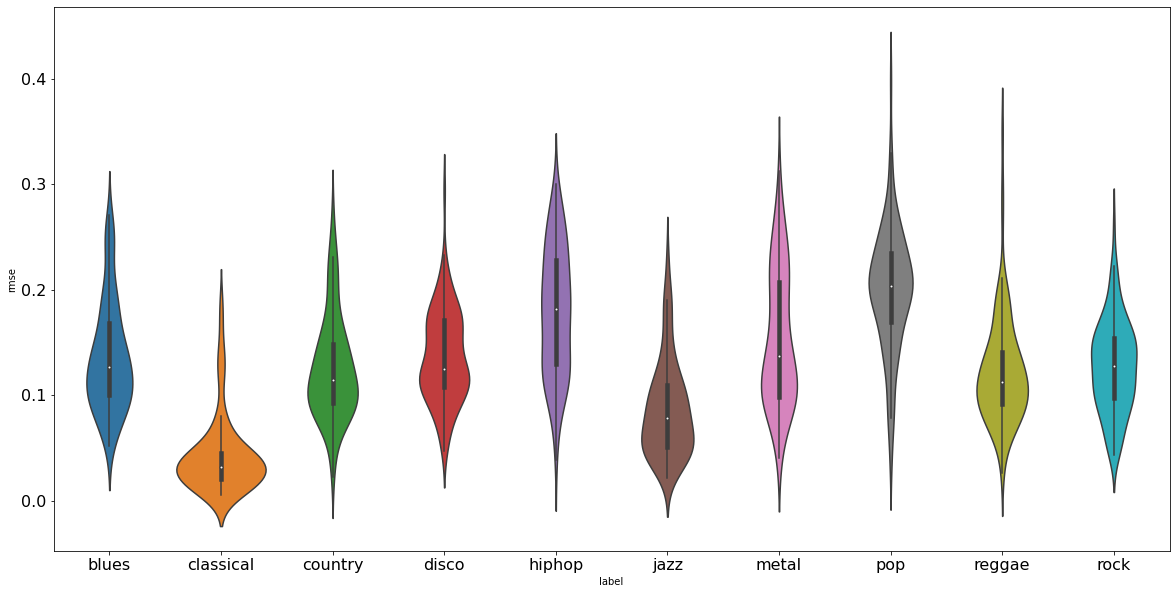

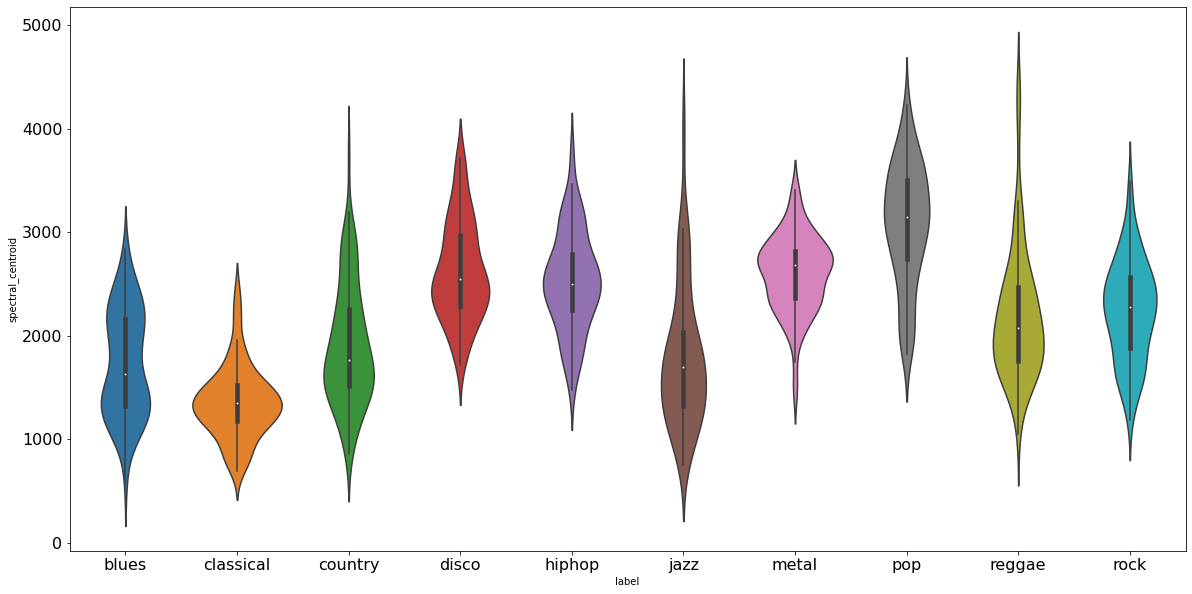

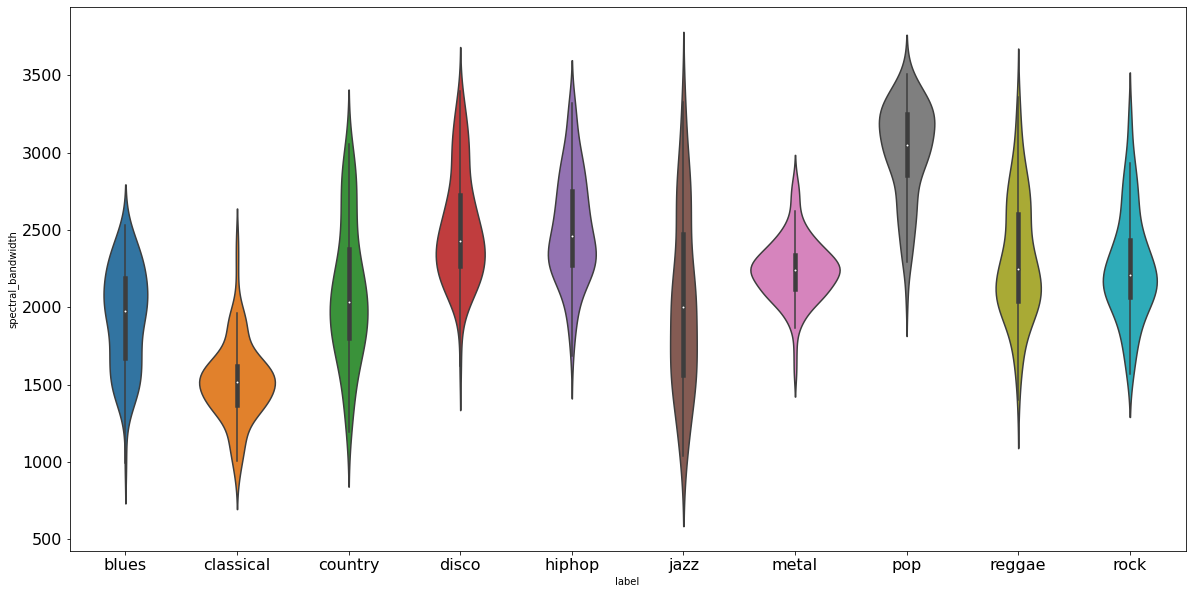

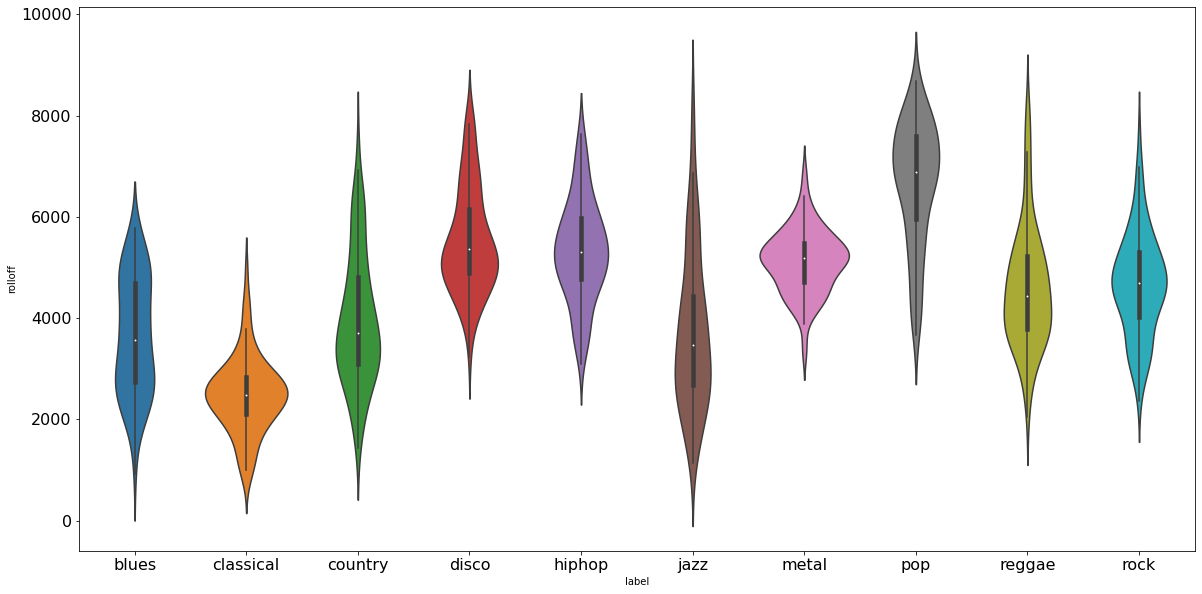

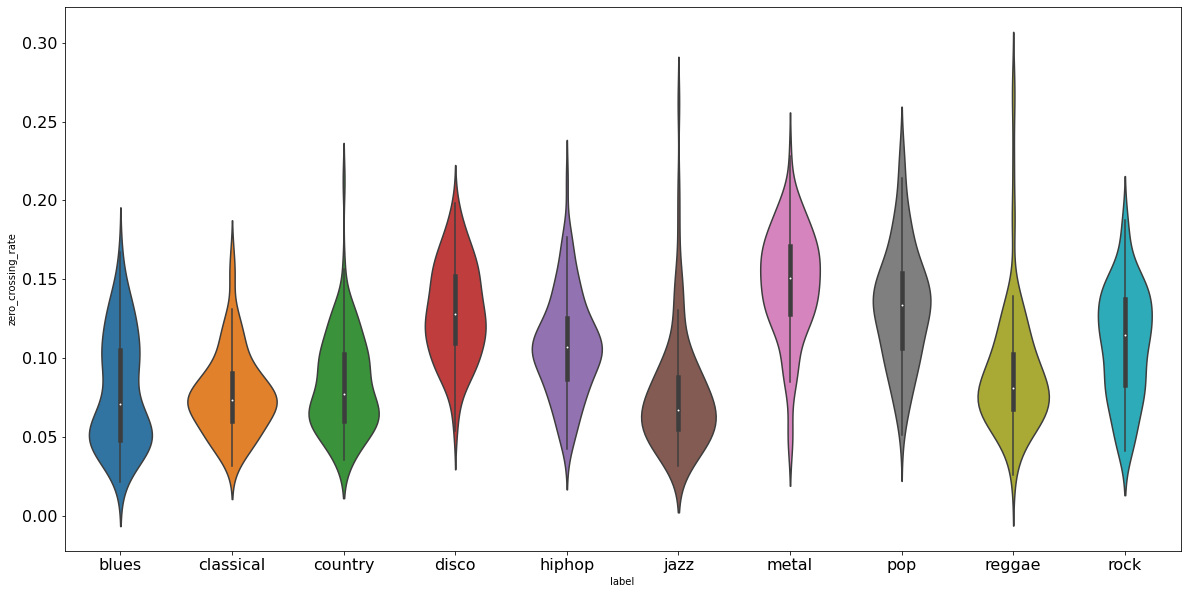

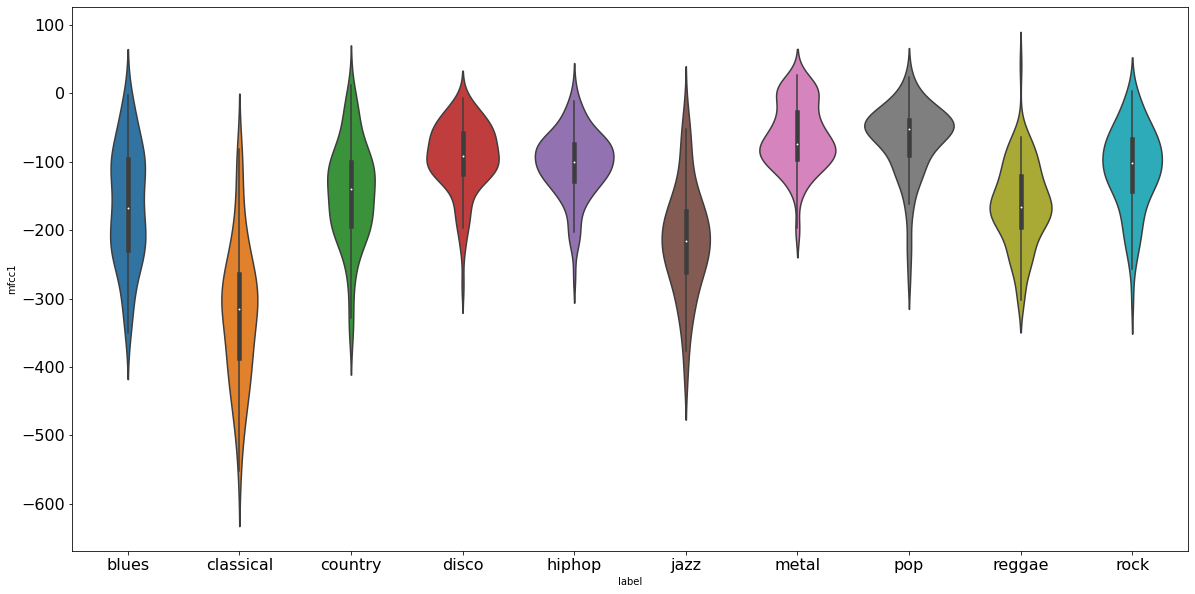

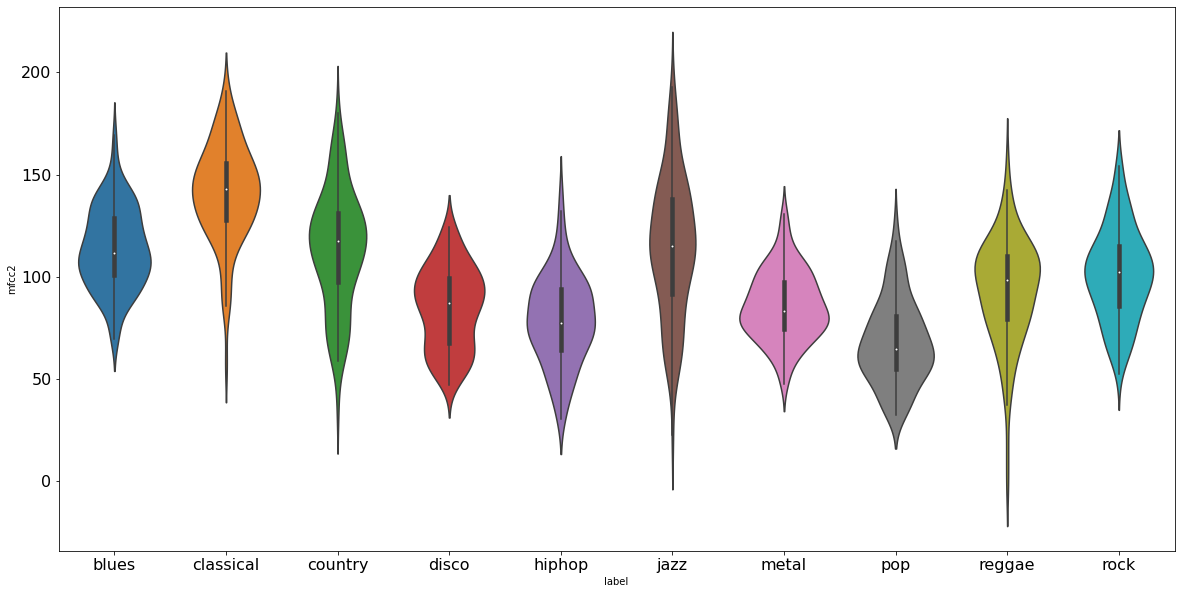

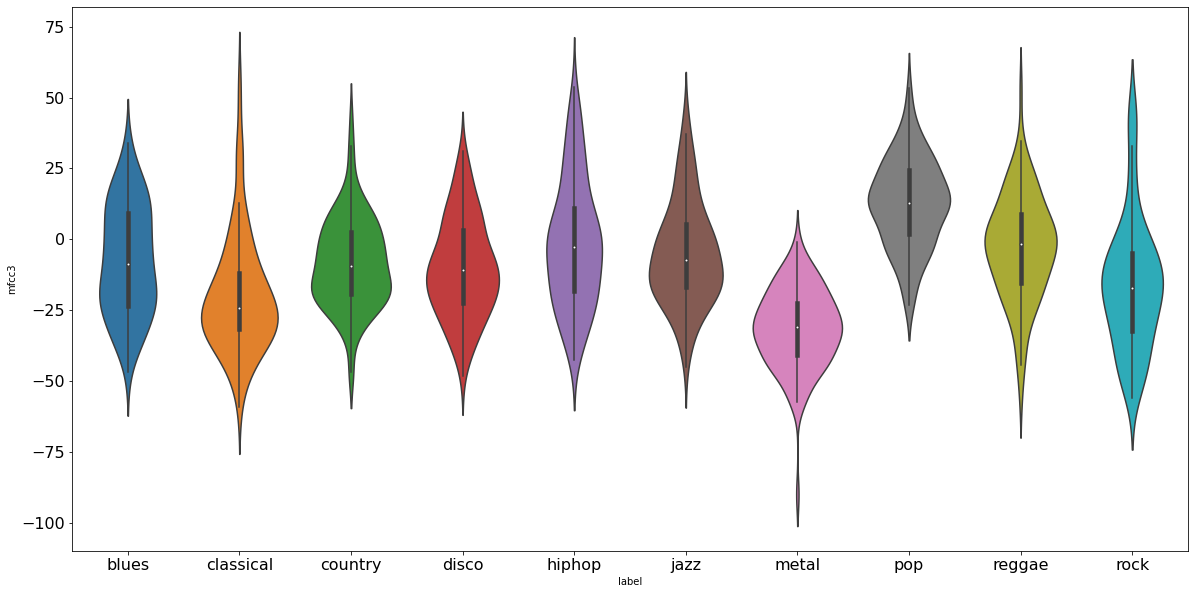

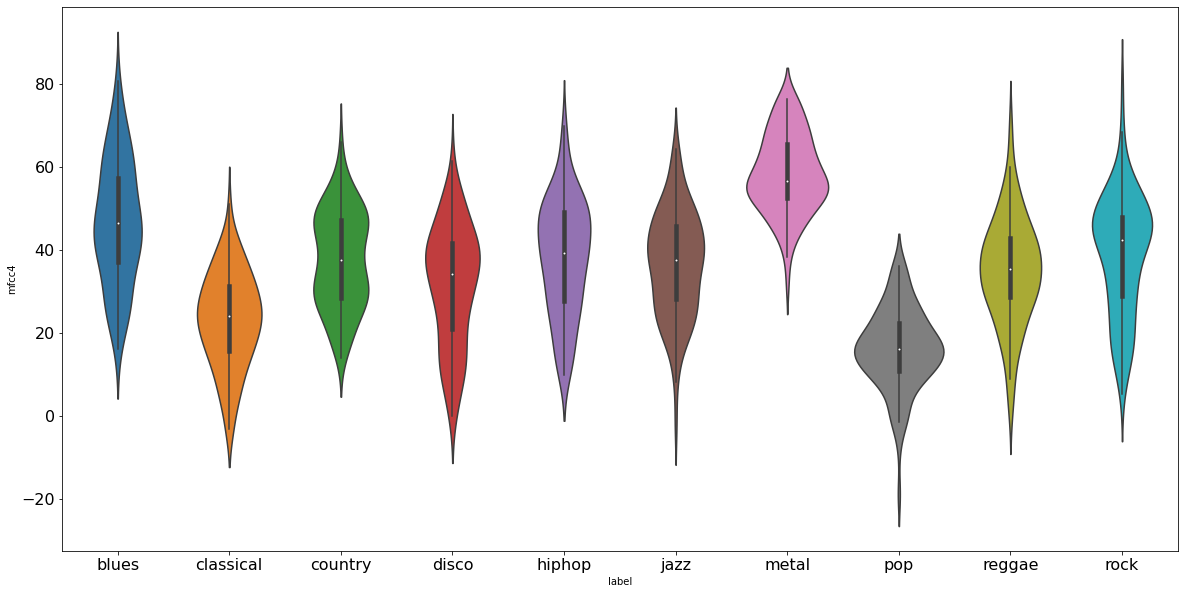

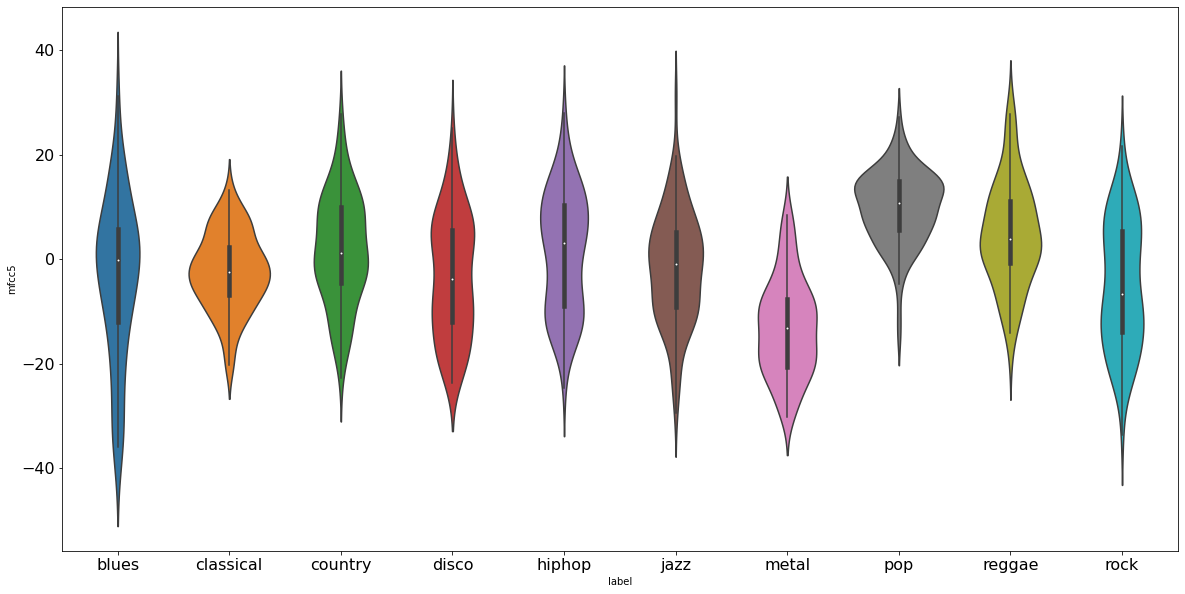

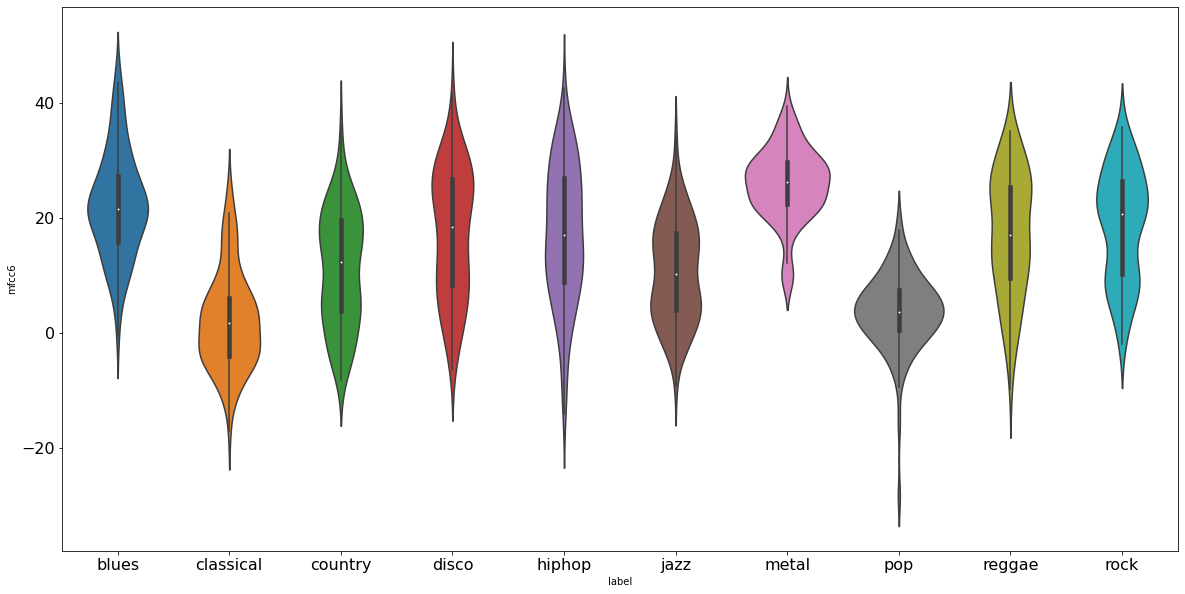

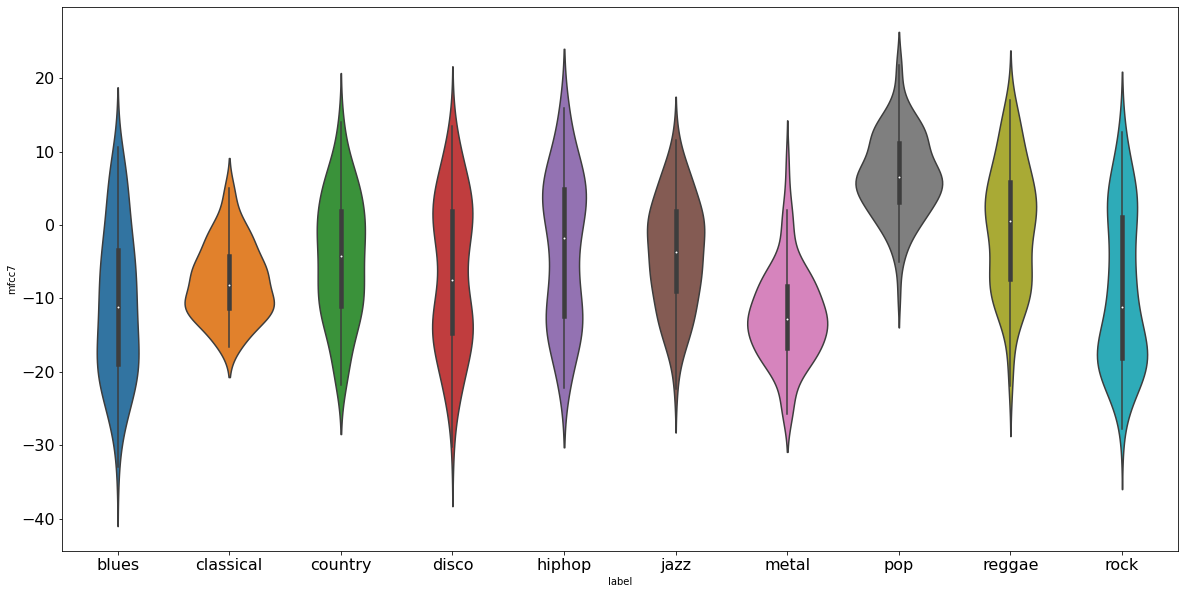

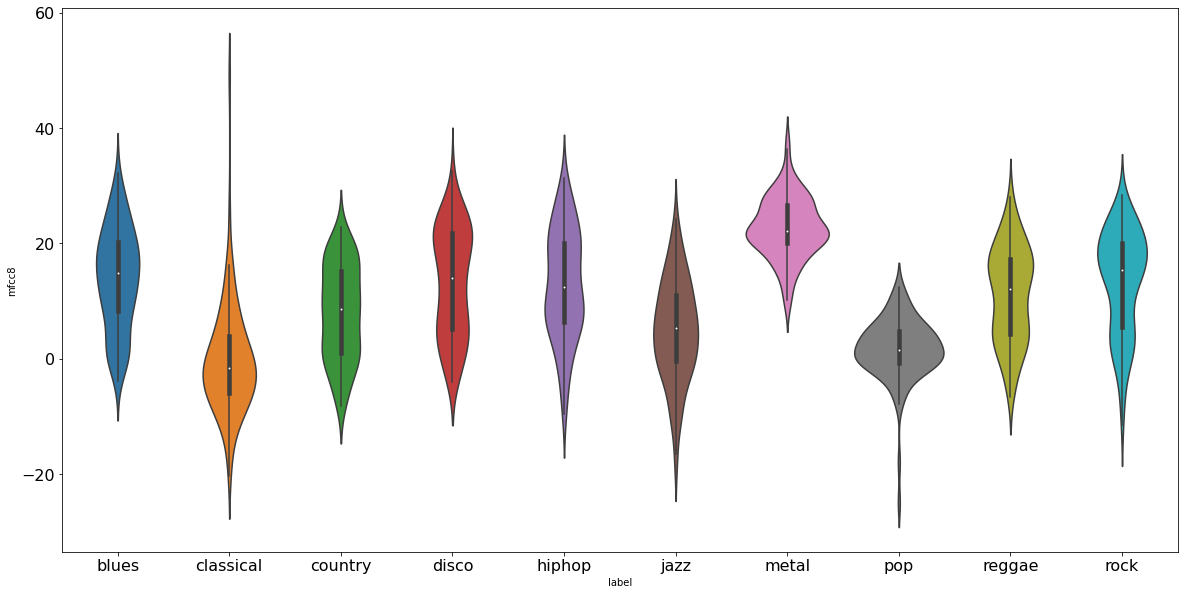

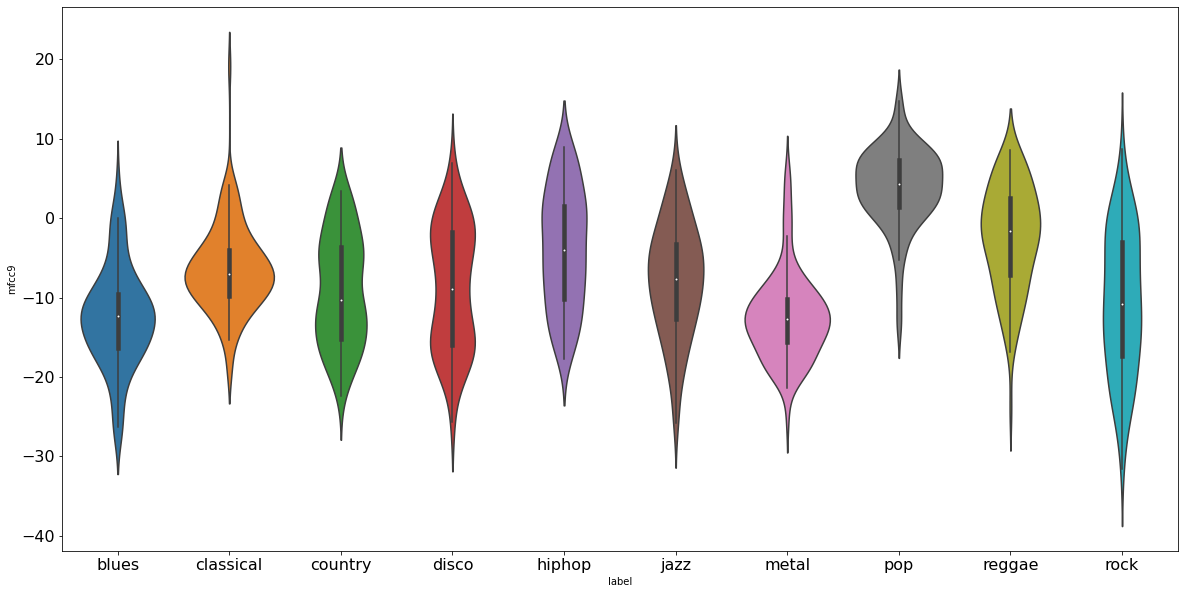

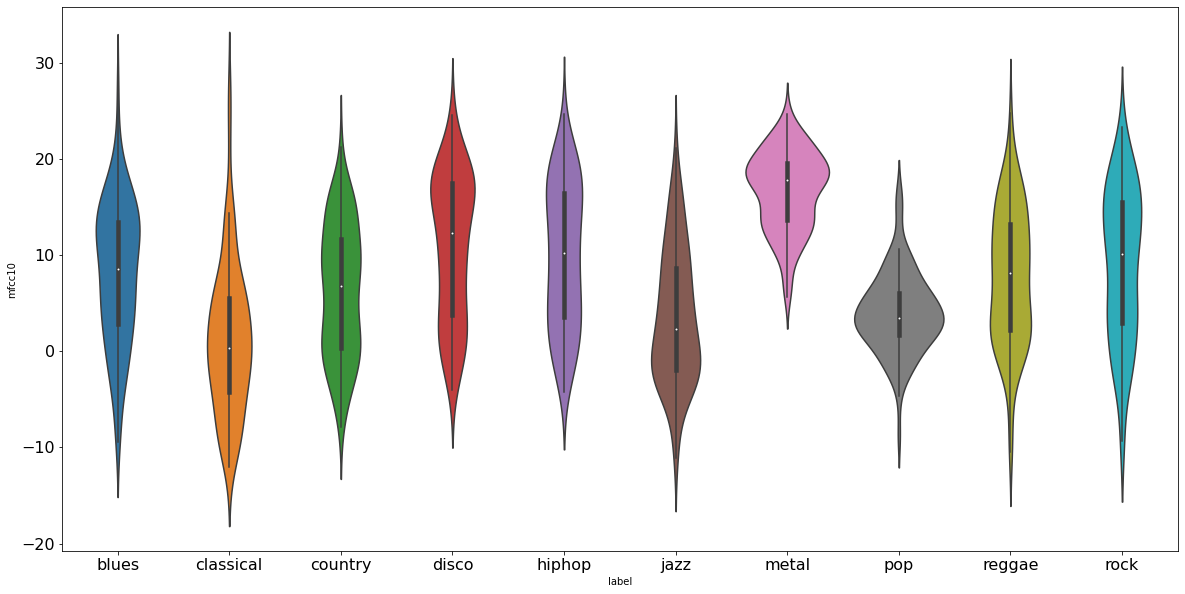

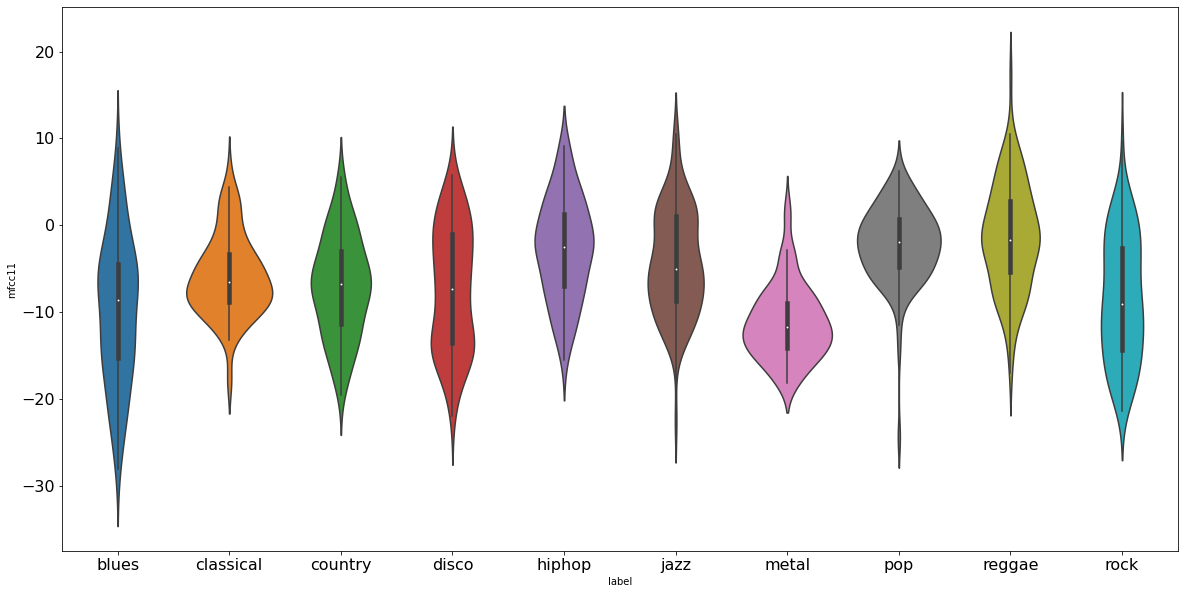

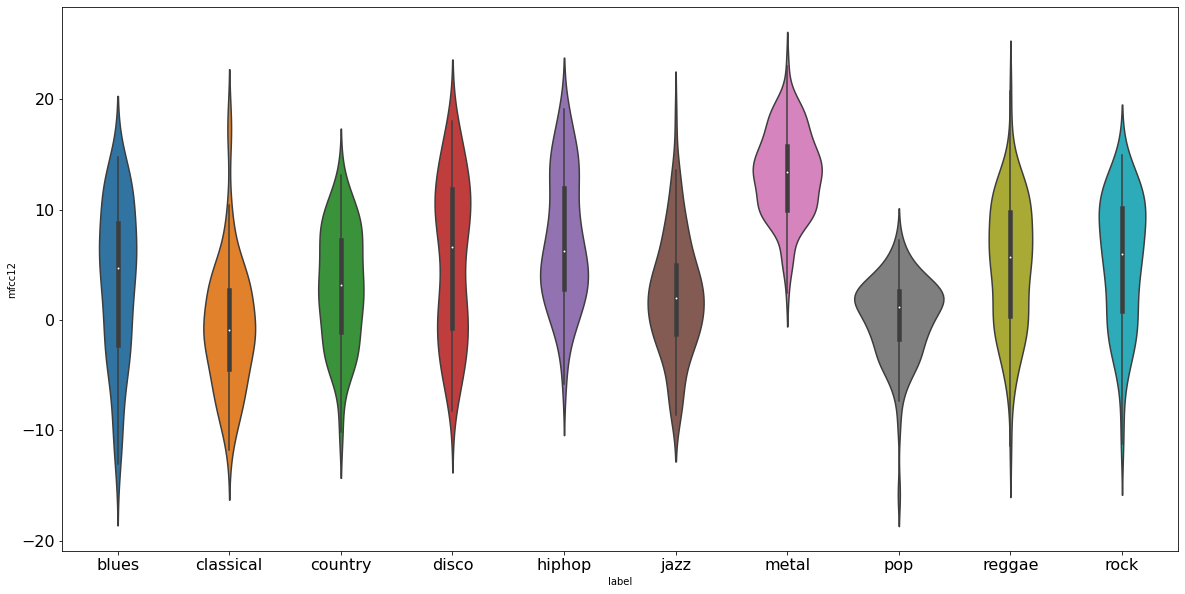

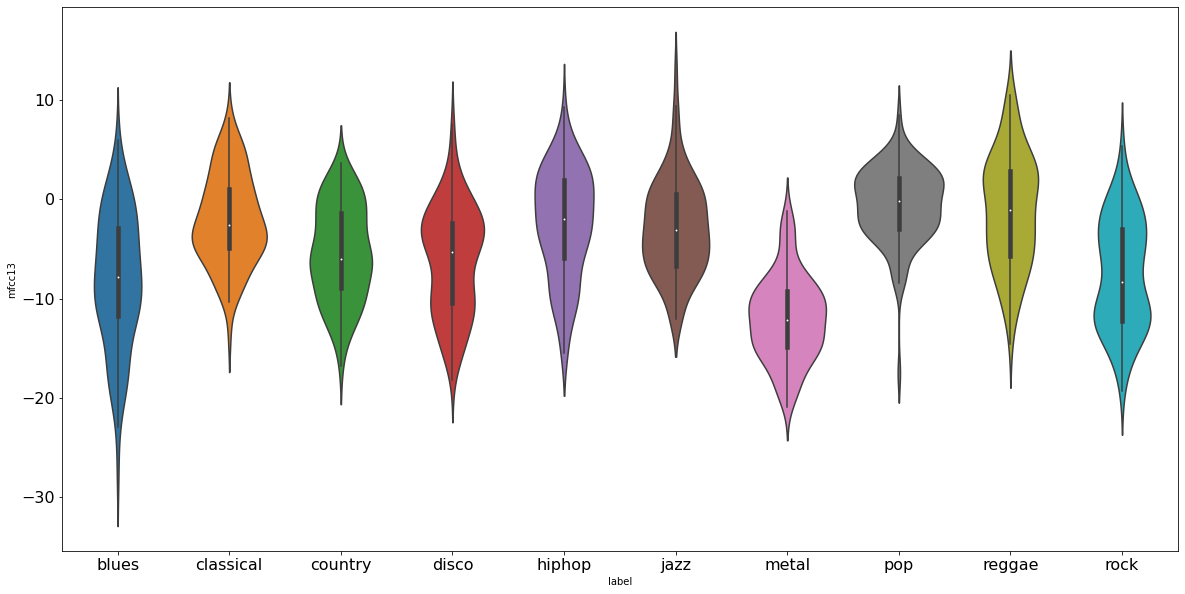

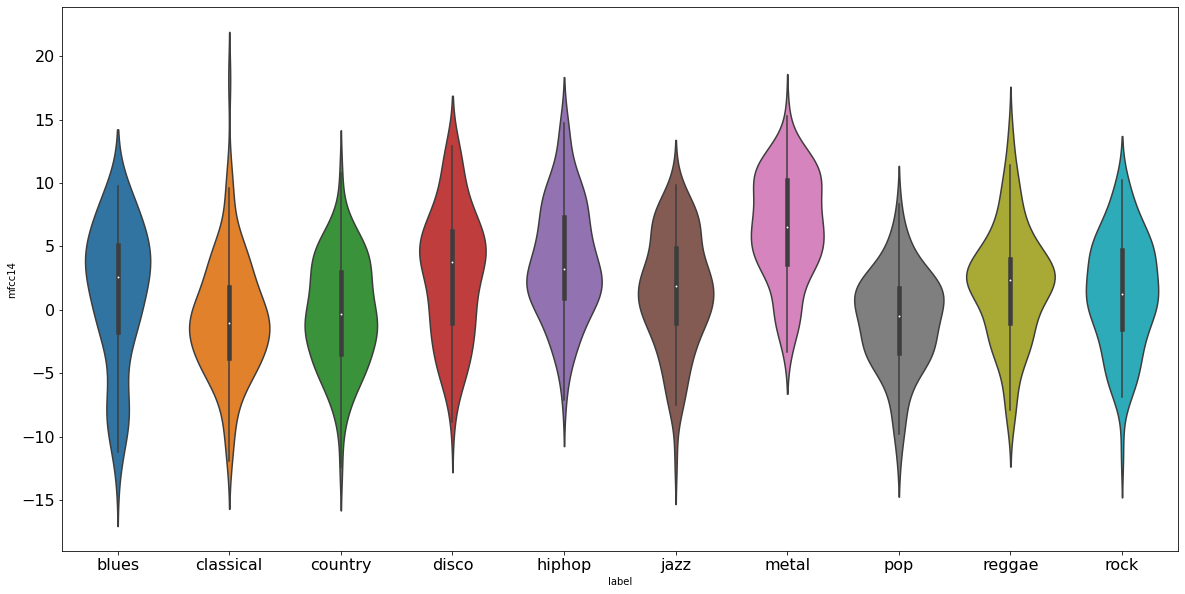

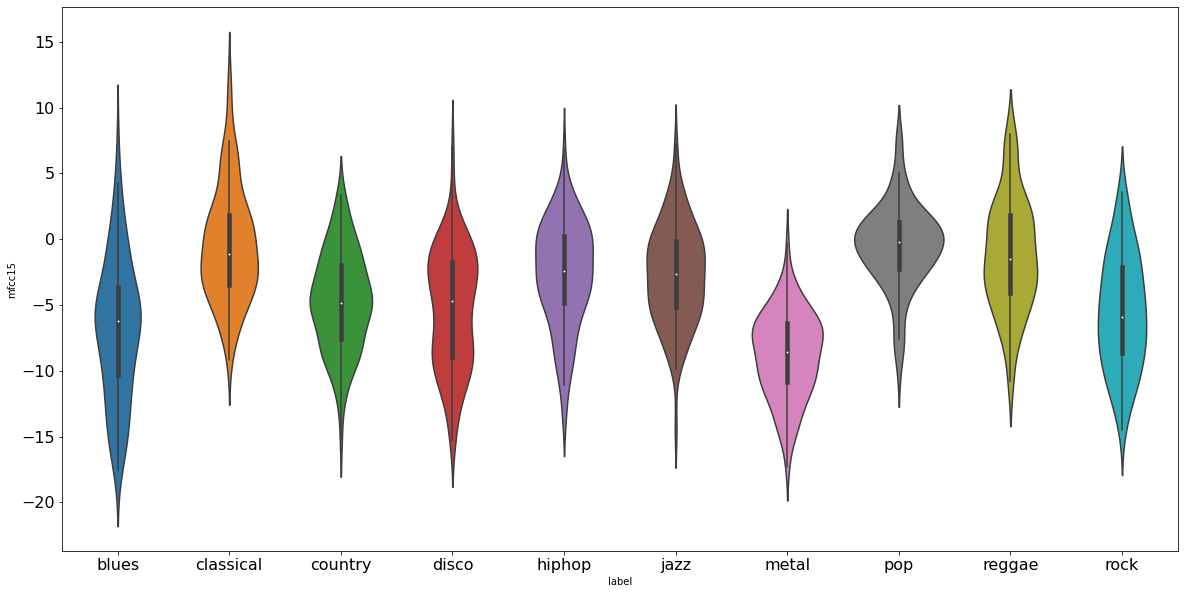

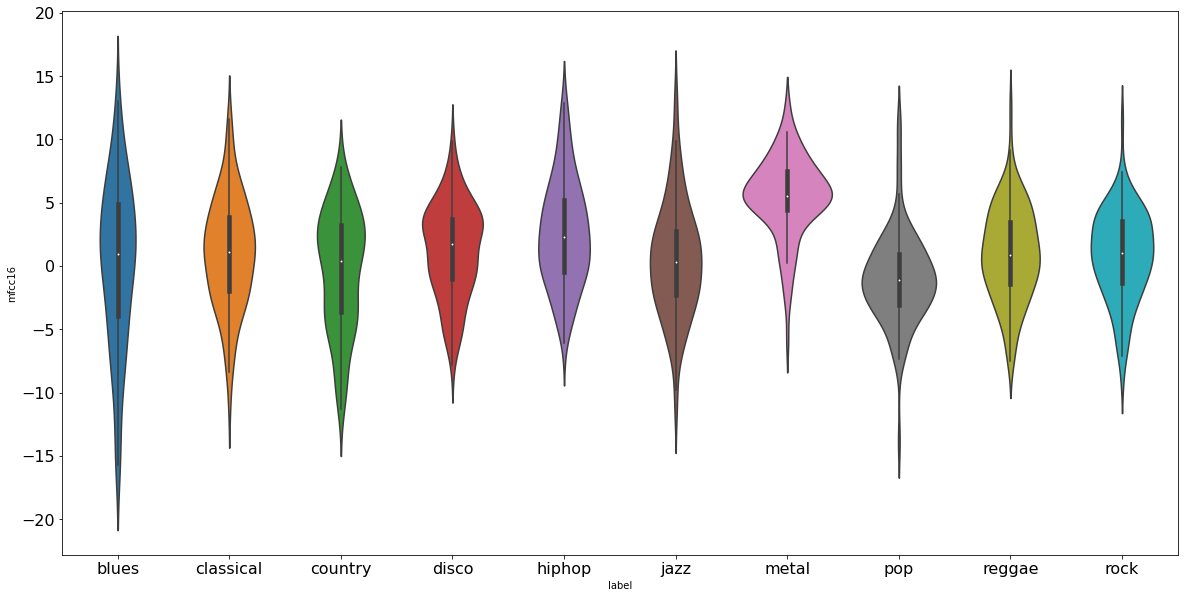

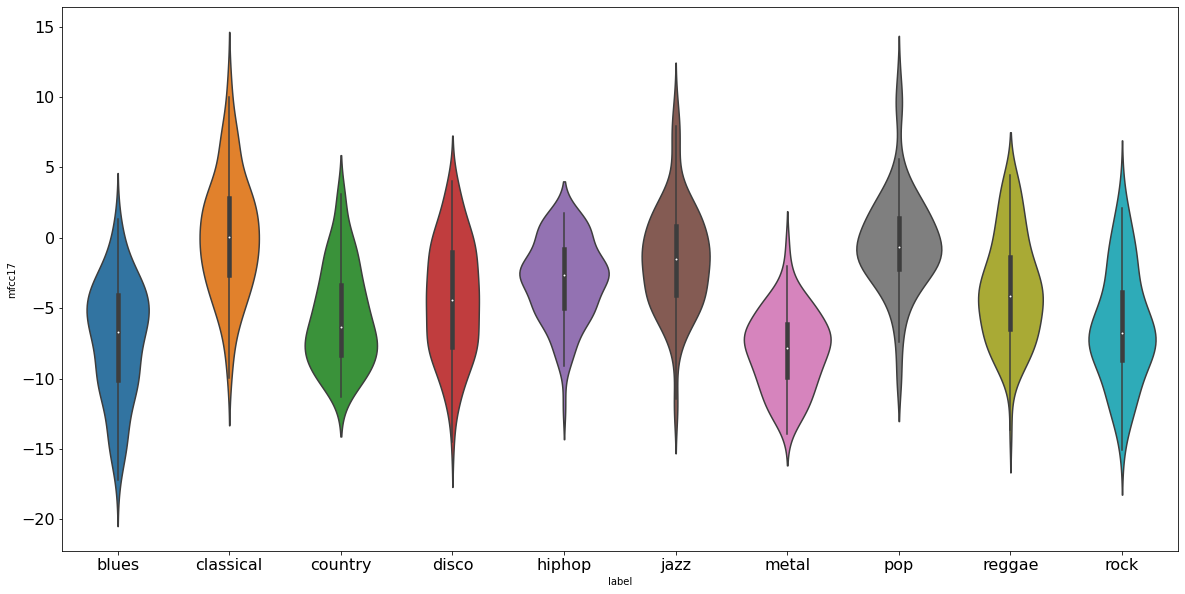

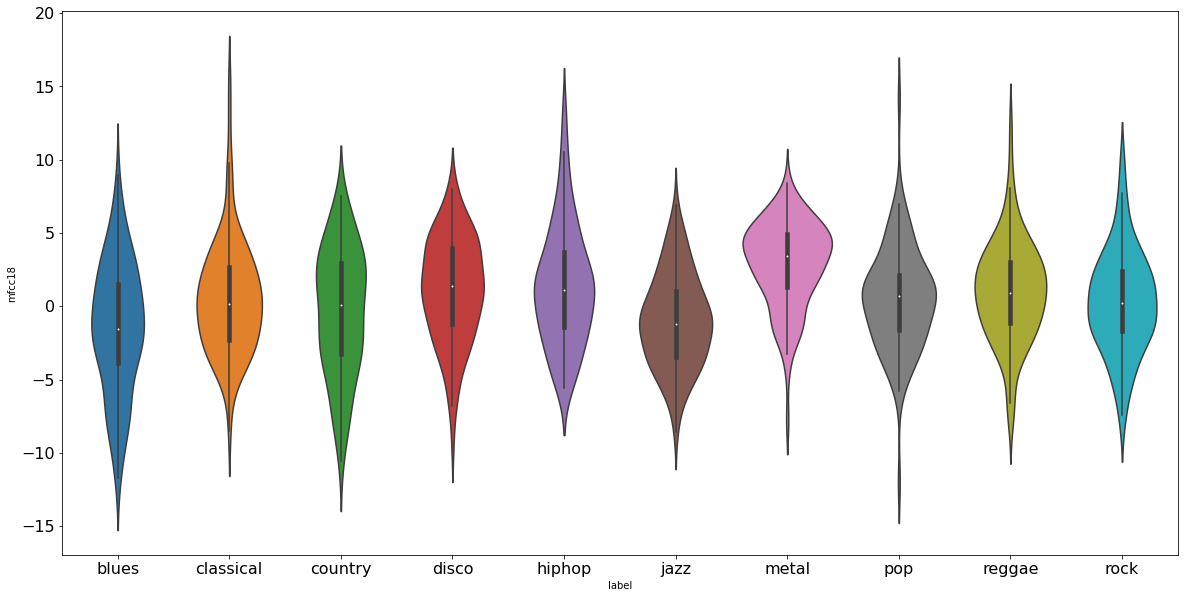

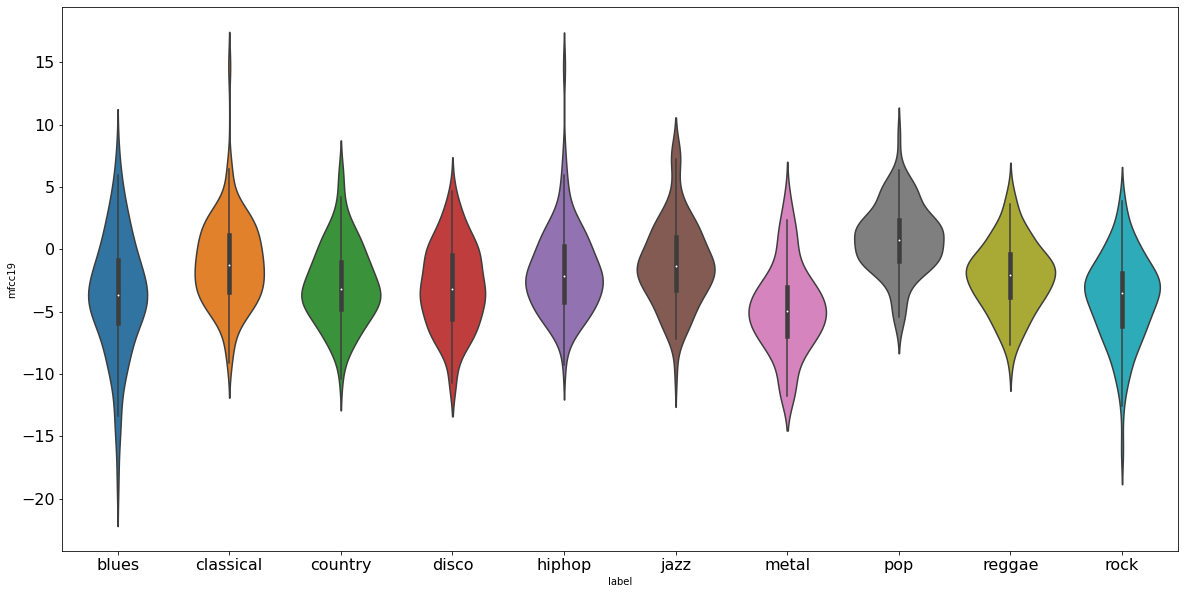

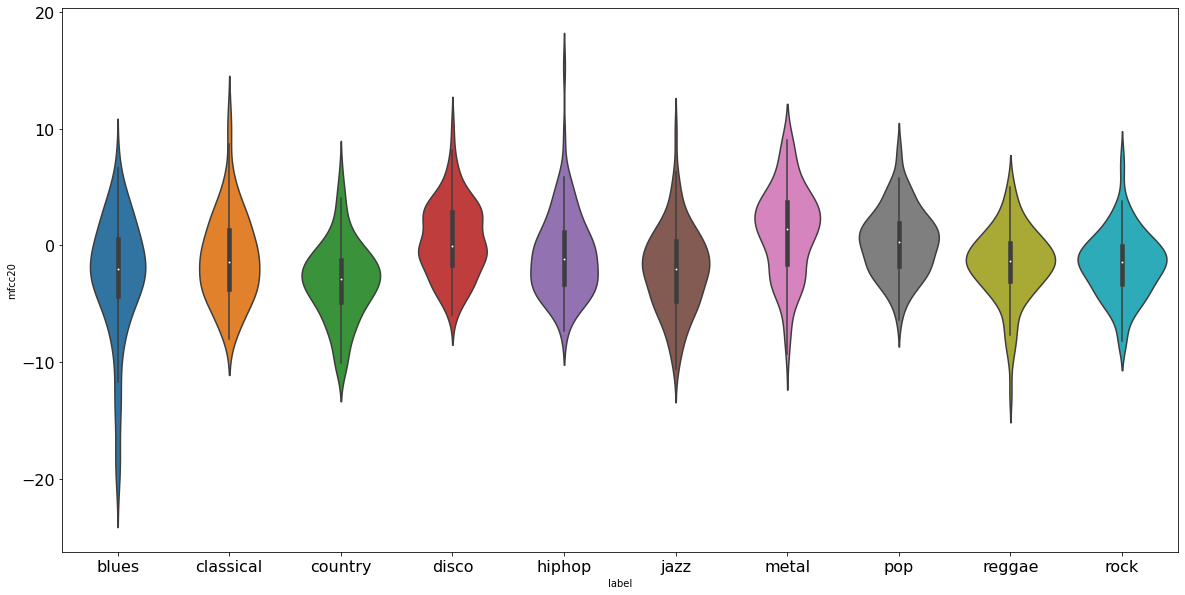

In [8]:
features = list(music_df.columns)
features.remove('filename')
features.remove('label')
print(features)

for feat in features:
    fig, ax = plt.subplots(figsize=(20,10))
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    sns.violinplot(data=music_df, x='label', y=feat, figsize=(20,10))
    plt.savefig(feat)

In [10]:
music_features_df = music_df[features]
music_features_norm_df = scale(music_features_df)

<ipython-input-11-b87560243428>:37: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(plot, cax=cax, cmap='hot')
<ipython-input-11-b87560243428>:37: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(plot, cax=cax, cmap='hot')


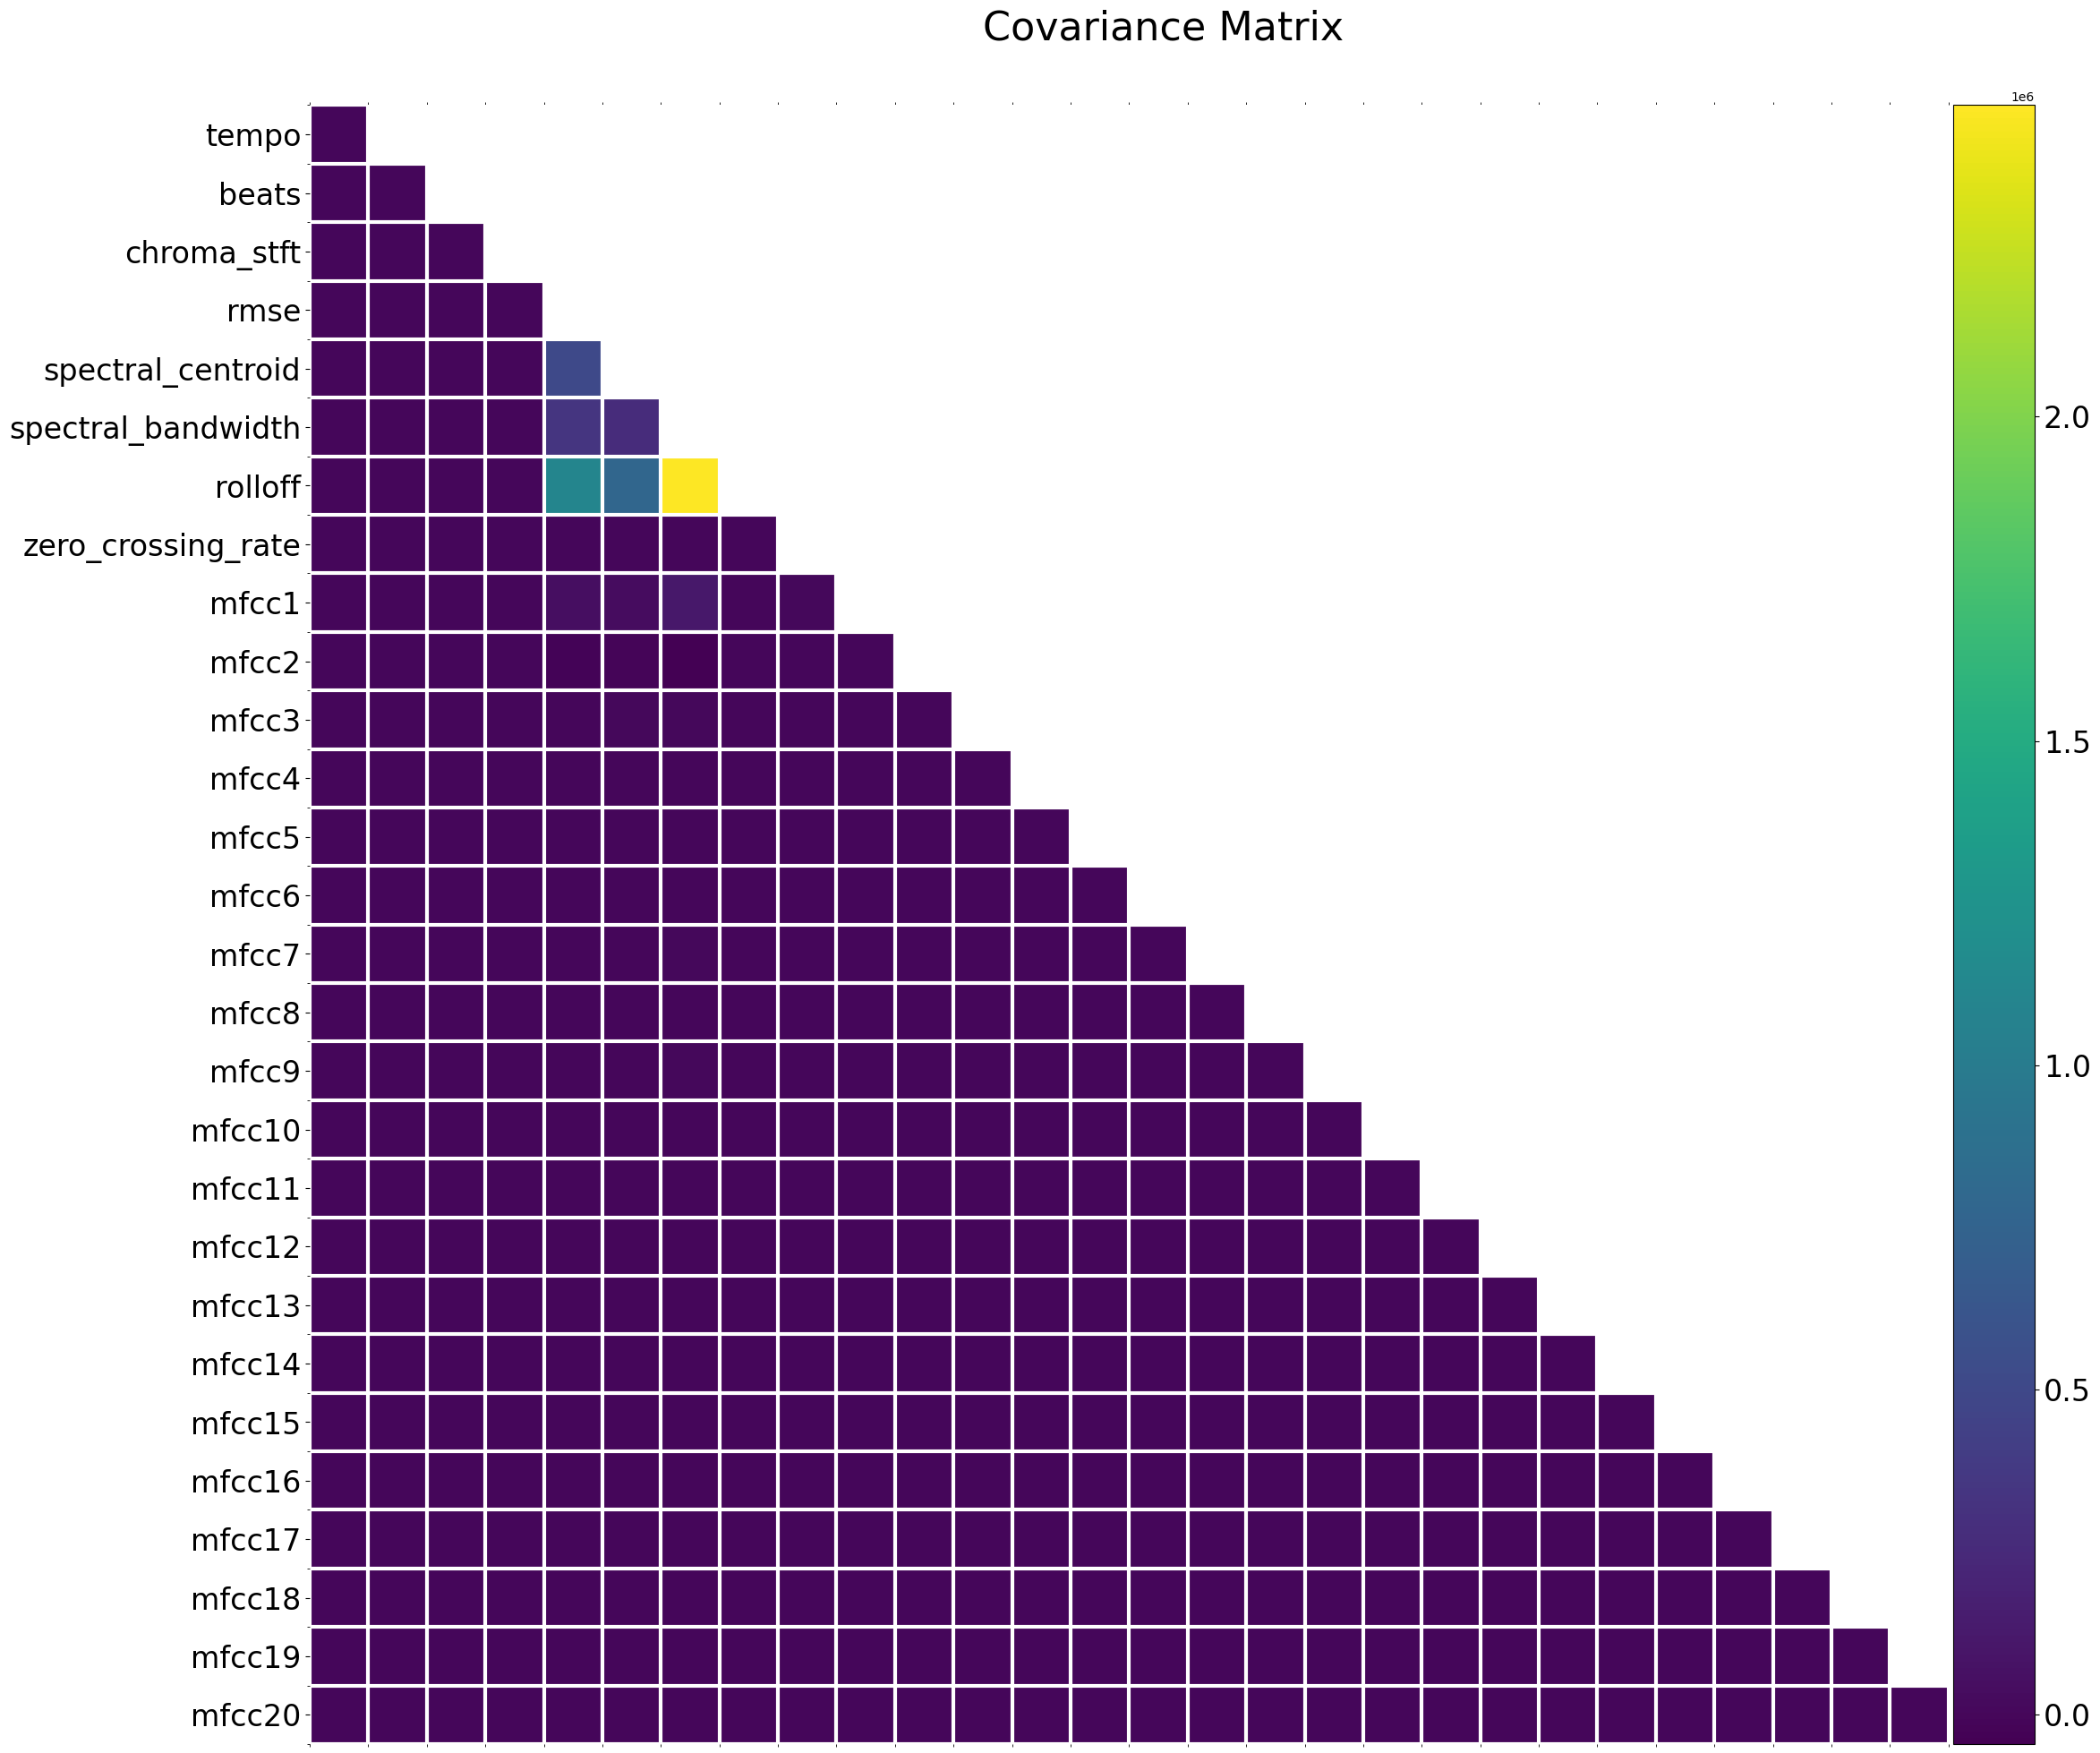

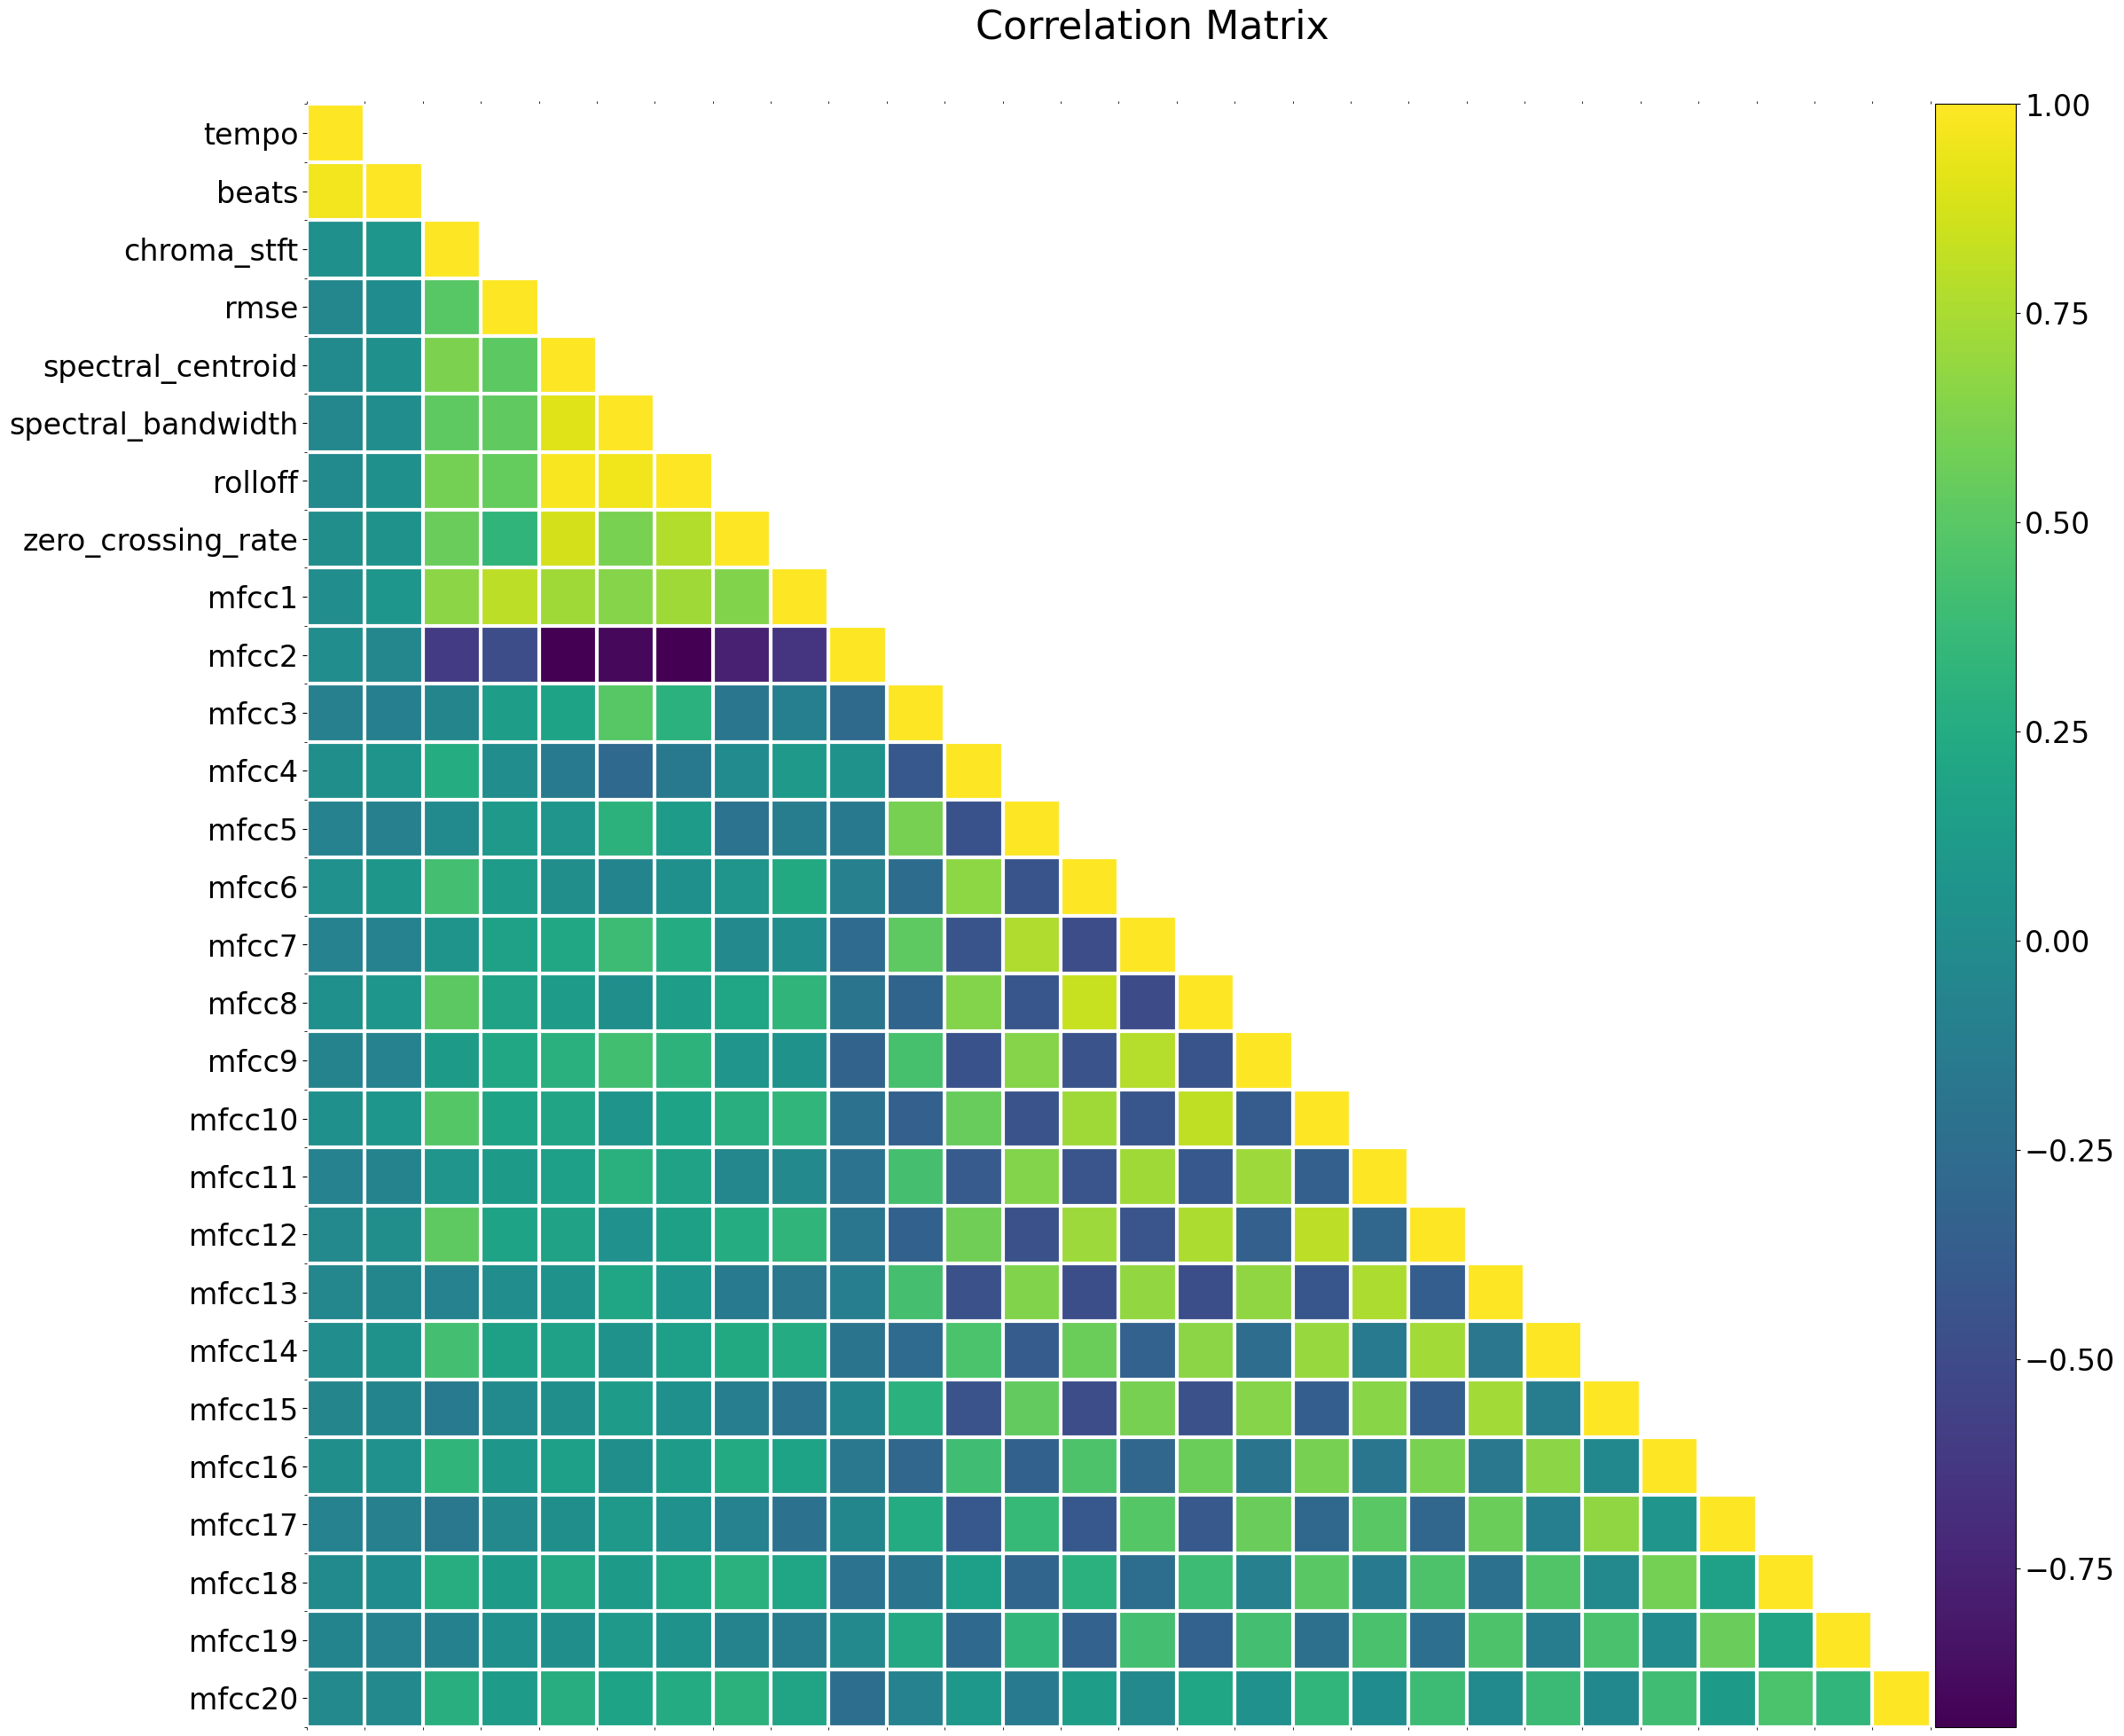

In [11]:
def lower_diag_matrix_plot(matrix, title=None):
    """ Args:
        matrix - the full size symmetric matrix of any type that is lower diagonalized
        title - title of the plot
    """
    plt.style.use('default')
    
    # Create lower triangular matrix to mask the input matrix
    triu = np.tri(len(matrix), k=0, dtype=bool) == False
    matrix = matrix.mask(triu)
    fig, ax = plt.subplots(figsize=(20,20))
    if title:
        fig.suptitle(title, fontsize=32, verticalalignment='bottom')
        fig.tight_layout()
    plot = ax.matshow(matrix)
    
    # Add grid lines to separate the points
    # Adjust the ticks to create visually appealing grid/labels
    # Puts minor ticks every half step and bases the grid off this
    ax.set_xticks(np.arange(-0.5, len(matrix.columns), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(matrix.columns), 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=3)
    # Puts major ticks every full step and bases the labels off this
    ax.set_xticks(np.arange(0, len(matrix.columns), 1))
    ax.set_yticks(np.arange(0, len(matrix.columns), 1))
    plt.yticks(range(len(matrix.columns)), matrix.columns)
    # Must put this here for x axis grid to show
    plt.xticks(range(len(matrix.columns)))
    ax.tick_params(axis='both', which='major', labelsize=24)
    # Whitens (transparent) x labels
    ax.tick_params(axis='x', colors=(0,0,0,0))
    
    # Add a colorbar for reference
    cax = make_axes_locatable(ax)
    cax = cax.append_axes("right", size="5%", pad=0.05)
    cax.tick_params(axis='both', which='major', labelsize=24)
    fig.colorbar(plot, cax=cax, cmap='hot')
    
    # Get rid of borders of plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
cov_matrix = music_features_df.cov()
lower_diag_matrix_plot(cov_matrix, 'Covariance Matrix')
plt.savefig('Covariance Matrix')

corr_matrix = music_features_df.corr()
lower_diag_matrix_plot(corr_matrix, 'Correlation Matrix')
plt.savefig('Correlation Matrix')

In [16]:
music_df_no_categories = music_features_df.copy()
music_df_no_categories['label'] = music_df['label']
# sns.pairplot(music_df, hue='label')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AttributeError: 'DataFrame' object has no attribute 'as_matrix'

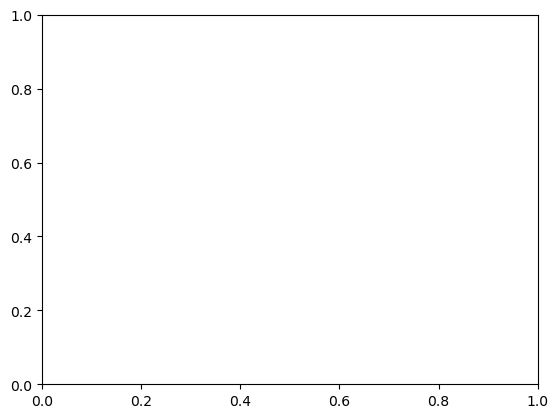

In [17]:
enc = OneHotEncoder()
solvers = ['svd', 'eigen']
for solver in solvers:
    clf = LinearDiscriminantAnalysis(solver=solver, n_components=2)
    le = LabelEncoder()

    new_labels = pd.DataFrame(le.fit_transform(music_df['label']))
    music_df['label'] = new_labels

    params = clf.fit_transform(music_features_norm_df, new_labels,)
    fig, ax = plt.subplots()
    labels_list = list(set(list(new_labels)))
    ax.scatter(params[:,0], params[:,1], c=new_labels.as_matrix().reshape(params[:,0].shape))
    ax.legend()